In [39]:
# link where the code was taken : https://github.com/armandwayoff/Travelling-Salesman-Problem/blob/master/Nearest%20Neighbour%20Algorithm/NN_vizualisation.py

import tsplib95
import time
import matplotlib.pyplot as plt
import networkx as nx
from math import sqrt
import gzip
import shutil
import numpy

In [40]:
# Opening zip file
with gzip.open('ch130.tsp.gz', 'rb') as f_in:
    with open('ch130.tsp', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [41]:
with gzip.open('tsp225.tsp.gz', 'rb') as f_in:
    with open('tsp225.tsp', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [42]:
# difining problem1
problem1 = tsplib95.load('ch130.tsp')


In [43]:
#defining problem2
problem2 = tsplib95.load('tsp225.tsp')

In [44]:
#defining a vertex as a class
class Vertex:
    def __init__(self, x, y, name):
        self.x = x
        self.y = y
        self.name = name

In [45]:
#euclidean distance function
def dist(v1, v2):
        return sqrt((v1.x - v2.x) ** 2 + (v1.y - v2.y) ** 2) 

In [63]:
#Nearest neighbor algorithm
def nearest_neighbor_aux(population, starting_vertex): 
    visited_vertices = [population[starting_vertex].name]
    path = [population[starting_vertex].name]
    current_vertex = starting_vertex
    nearest_vertex = current_vertex
    start = time.perf_counter_ns()
    sum_dist = 0
    while len(visited_vertices) < len(population):
        record_distance = float('inf')
        for vertex in population:
            if vertex.name not in visited_vertices:
                d = dist(population[vertex.name], population[current_vertex])
                if d < record_distance:
                    nearest_vertex = vertex.name
                    record_distance = d
   
        visited_vertices.append(nearest_vertex)
        path.append(nearest_vertex)
        current_vertex = nearest_vertex
        sum_dist += record_distance
        
        
    duration = (time.perf_counter_ns()-start)/1000000
    sTime = duration
    return (path,sum_dist,sTime,starting_vertex)

def NearestNeighbor(nVertixes,Population):
    min_dist = float("inf")
    min_path = []
    min_time = []
    dist_list =[]
    time_list = []
    start_node = 0
    for i in range(0,nVertixes):
        result = nearest_neighbor_aux(Population,i)
        if(result[1] < min_dist):
            min_dist = result[1]
            min_path = result[0]
            min_time = result[2]
            start_node = result[3]
            
        dist_list = dist_list + [result[1]]
        time_list = time_list + [result[2]]
            
    print("* Nearest Neighbor Algorithm *")       
    print('The minimum path is:', min_path,  "with minimum distance travelled:", min_dist, "and running time of:", min_time, "ms. The starting node, in this case, is the", start_node,"node")
    return (dist_list, time_list)


In [68]:
#NN for problem2
vertixes = []
for i in range (1, 226):
    new_vertex = Vertex(problem2.node_coords[i][0], problem2.node_coords[i][1], i-1)
    vertixes.append(new_vertex) 
result2 = NearestNeighbor(225, vertixes)
sum1 = numpy.sum(result2[0])
sum2 = numpy.sum(result2[1])
print("The average travelled distance of the 225 iterations is:", sum1/225, "with the respect average running time of:",sum2/225, "ms" )

* Nearest Neighbor Algorithm *
The minimum path is: [20, 19, 202, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 196, 197, 2, 0, 199, 194, 193, 45, 44, 47, 192, 217, 195, 191, 190, 198, 223, 132, 189, 224, 46, 1, 206, 48, 50, 56, 55, 54, 51, 52, 53, 69, 70, 71, 72, 73, 74, 75, 215, 218, 216, 76, 77, 78, 79, 80, 94, 208, 93, 92, 91, 90, 89, 86, 209, 83, 82, 81, 84, 85, 130, 210, 129, 221, 128, 127, 126, 125, 124, 123, 122, 121, 120, 174, 119, 184, 118, 117, 185, 186, 116, 115, 222, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 219, 103, 102, 101, 100, 99, 98, 97, 96, 95, 220, 27, 203, 25, 24, 207, 23, 22, 21, 35, 36, 37, 38, 39, 40, 41, 42, 43, 49, 204, 188, 26, 187, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 57, 58, 183, 181, 172, 180, 173, 179, 178, 175, 176, 177, 171, 170, 169, 168, 167, 211, 213, 150, 149, 148, 151, 152, 153, 154, 155, 156, 143, 142, 200, 141, 140, 139, 138, 137, 136, 135, 182, 134, 133, 214, 163, 164, 165, 166, 212, 157, 162, 161, 160, 159, 158, 145

In [ ]:
#In problem2 the optimal distance is 3916 and in this case the minimum distance given is 4536

In [67]:
#NN for problem1
vertixes = []
for i in range (1, 131):
    new_vertex = Vertex(problem1.node_coords[i][0], problem1.node_coords[i][1], i-1)
    vertixes.append(new_vertex) 
result1 = NearestNeighbor(130, vertixes)
sum1 = numpy.sum(result1[0])
sum2 = numpy.sum(result1[1])
print("The average travelled distance of the 130 iterations is:", sum1/130, "with the respect average running time of:",sum2/130, "ms" )

* Nearest Neighbor Algorithm *
The minimum path is: [76, 102, 80, 86, 11, 94, 78, 115, 23, 14, 28, 88, 93, 109, 97, 67, 62, 69, 96, 25, 6, 87, 68, 63, 85, 123, 128, 60, 108, 75, 10, 4, 44, 15, 127, 104, 61, 111, 116, 38, 70, 40, 0, 129, 49, 1, 117, 79, 45, 19, 34, 53, 16, 30, 33, 26, 18, 99, 42, 103, 106, 126, 47, 24, 31, 112, 35, 83, 118, 110, 122, 100, 81, 56, 8, 55, 64, 51, 74, 73, 98, 72, 91, 37, 105, 57, 48, 52, 119, 59, 50, 41, 43, 39, 46, 36, 21, 22, 121, 54, 13, 9, 66, 95, 12, 32, 20, 17, 7, 107, 113, 2, 82, 29, 58, 120, 77, 89, 124, 84, 65, 27, 114, 125, 92, 3, 71, 90, 5, 101] with minimum distance travelled: 6651.164391740215 and running time of: 21.6026 ms. The starting node, in this case, is the 76 node
The average travelled distance of the 130 iterations is: 7212.822859218781 with the respect average running time of: 24.85360692307692 ms


In [ ]:
#In problem1 the optimal distance is 6110 and in this case the minimum distance given is 6651

In [69]:
# Two directional Nearest Neighbor algorithm
def bi_nearest_neighbor_aux(population, starting_vertex):  
    visited_vertices = [population[starting_vertex].name]
    path = [population[starting_vertex].name]
    current_vertex = starting_vertex
    nearest_vertex = current_vertex
    sTime = 0 
    path_dist = 0
    start = time.perf_counter_ns()
    while len(visited_vertices) < len(population):
        record_distance = float('inf')
        flag = 0
        for vertex in population:
            if vertex.name not in visited_vertices:


                if(len(path) == 1):
                    d = dist(population[vertex.name], population[current_vertex])
                    if d < record_distance:
                        nearest_vertex = vertex.name
                        record_distance = d

                else:
                    d_start = dist(population[vertex.name], population[path[0]])
                    d_end = dist(population[vertex.name], population[path[-1]])

                    if(d_start < d_end):

                        if d_start < record_distance:

                            nearest_vertex = vertex.name
                            record_distance = d_start
                            flag = 1
                    else:
                        if d_end < record_distance:

                            nearest_vertex = vertex.name
                            record_distance = d_end
                            flag = 2
        
        visited_vertices.append(nearest_vertex)

        if(flag == 1):
            path.insert(0, nearest_vertex)
        else:
            path.append(nearest_vertex)

        path_dist += record_distance
        duration = (time.perf_counter_ns()-start)/1000000
        sTime = duration
    
    return (path,path_dist,sTime,starting_vertex)

def BirectionalNearestNeighbor(nVertixes,Population):
    min_dist = float("inf")
    min_path = []
    min_time = []
    dist_list =[]
    time_list = []
    start_node = 0
    for i in range(0,nVertixes):
        result = bi_nearest_neighbor_aux(Population,i)

        if(result[1] < min_dist):
            min_dist = result[1]
            min_path = result[0]
            min_time = result[2]
            start_node = result[3]
            
        dist_list = dist_list + [result[1]]
        time_list = time_list + [result[2]]
            
    print('* Two Directional Nearest Neighbor Algorithm *')        
    print('The minimum path is:', min_path,  "with minimum distance travelled:", min_dist, "and running time of:", min_time, "ms. The starting node, in this case, is the", start_node,"node")
    return (dist_list, time_list)

In [70]:
# 2NN for problem2
vertixes = []
for i in range (1, 226):
    new_vertex = Vertex(problem2.node_coords[i][0], problem2.node_coords[i][1], i-1)
    vertixes.append(new_vertex) 
result22 = BirectionalNearestNeighbor(225, vertixes)
sum11 = numpy.sum(result22[0])
sum22 = numpy.sum(result22[1])
print("The average travelled distance of the 225 iterations is:", sum11/225, "with the respect average running time of:",sum22/225, "ms" )


* Two Directional Nearest Neighbor Algorithm *
The minimum path is: [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 96, 95, 209, 86, 91, 90, 89, 88, 87, 144, 145, 146, 147, 152, 153, 154, 155, 156, 143, 142, 200, 141, 140, 139, 138, 137, 136, 135, 182, 134, 133, 214, 131, 128, 221, 129, 210, 130, 85, 84, 83, 82, 81, 220, 93, 92, 208, 94, 79, 80, 78, 77, 76, 216, 218, 215, 30, 205, 201, 29, 28, 27, 203, 25, 24, 207, 23, 22, 12, 13, 14, 15, 16, 19, 202, 18, 17, 10, 11, 36, 35, 33, 32, 34, 31, 37, 38, 39, 40, 41, 42, 43, 45, 193, 217, 192, 195, 191, 190, 198, 223, 132, 189, 224, 46, 1, 206, 48, 50, 56, 55, 54, 51, 52, 53, 69, 70, 71, 72, 73, 74, 75, 97, 98, 99, 100, 101, 102, 103, 219, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 222, 115, 116, 186, 117, 118, 185, 184, 119, 174, 120, 121, 122, 123, 168, 167, 211, 213, 150, 149, 148, 151, 166, 165, 164, 163, 212, 157, 162, 161, 160, 159, 158, 127, 126, 125, 124, 169, 170, 171, 172, 180, 173, 179, 178, 175, 176, 177, 181, 183, 18

In [ ]:
# The optimal distance for problem2 is 3916 and in this case the minimum distance given is 4489, approximately, which is better than with the NN algorithm

In [71]:
#2NN for problem1
vertixes = []
for i in range (1, 131):
    new_vertex = Vertex(problem1.node_coords[i][0], problem1.node_coords[i][1], i-1)
    vertixes.append(new_vertex)
result11 = BirectionalNearestNeighbor(130, vertixes) 
sum11 = numpy.sum(result11[0])
sum22 = numpy.sum(result11[1])
print("The average travelled distance of the 130 iterations is:", sum11/130, "with the respect average running time of:",sum22/130, "ms" )


* Two Directional Nearest Neighbor Algorithm *
The minimum path is: [81, 100, 122, 110, 118, 83, 35, 112, 31, 24, 47, 42, 126, 106, 103, 3, 92, 125, 114, 27, 65, 84, 124, 89, 77, 120, 58, 29, 82, 2, 113, 107, 7, 17, 20, 32, 12, 95, 66, 9, 13, 54, 121, 22, 21, 36, 46, 39, 43, 41, 50, 59, 119, 52, 48, 57, 105, 37, 78, 94, 28, 14, 23, 115, 99, 18, 26, 33, 30, 16, 53, 34, 19, 45, 79, 117, 1, 49, 129, 0, 40, 70, 38, 116, 111, 61, 104, 127, 15, 44, 4, 10, 75, 108, 60, 128, 123, 63, 68, 87, 85, 25, 96, 69, 6, 62, 67, 97, 109, 88, 93, 76, 102, 80, 86, 11, 64, 55, 56, 8, 51, 74, 73, 98, 72, 91, 71, 90, 5, 101] with minimum distance travelled: 6625.5961500967105 and running time of: 33.3871 ms. The starting node, in this case, is the 63 node
The average travelled distance of the 130 iterations is: 6949.04703851558 with the respect average running time of: 39.061197692307694 ms


In [ ]:
# The optimal distance for problem1 is 6110 and in this case the minimum distance given is 6626, approximately, which is better than with the NN algorithm

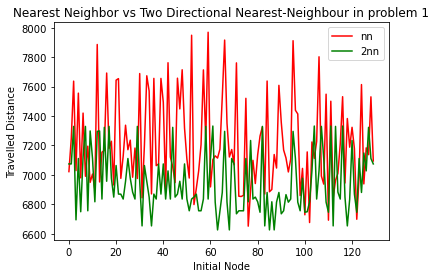

In [72]:
#comparing the two algorithms with a plot distance vs initial node in problem 1

x =[x for x in range(0,130)]

y1 = result1[0]
y11 = result11[0]

plt.plot(x, y1, color='r', label='nn')
plt.plot(x, y11, color='g', label='2nn')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Initial Node")
plt.ylabel("Travelled Distance")
plt.title("Nearest Neighbor vs Two Directional Nearest-Neighbour in problem 1")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()


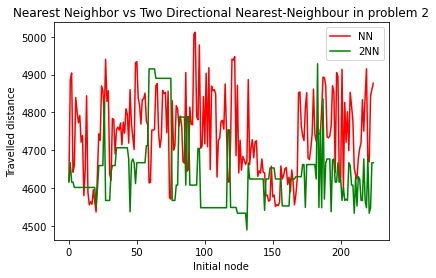

In [73]:
#comparing the two algorithms with a plot distance vs initial node in problem 2
x =[x for x in range(0,225)]

y2 = result2[0]
y22 = result22[0]
plt.plot(x, y2, color='r', label='NN')
plt.plot(x, y22, color='g', label='2NN')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Initial node")
plt.ylabel("Travelled distance")
plt.title("Nearest Neighbor vs Two Directional Nearest-Neighbour in problem 2")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [74]:
#list with the travelled distance and running times in problem1

list1_nn = []
list1_mnn = []
time1_nn = []
time1_mnn = []


for i in range (0,130):
    list1_nn.append(result1[0][i])
    list1_mnn.append(result11[0][i])
    time1_nn.append(result1[1][i])
    time1_mnn.append(result11[1][i])
    
    
print("The minimum running time with the NN:",min(time1_nn),"ms \n","The maximum running time with the NN:",max(time1_nn),"ms \n","The minimum running time with the 2NN:",min(time1_mnn),"ms \n","The maximum running time with the 2NN:",max(time1_mnn),"ms")

The minimum running time with the NN: 21.4752 ms 
 The maximum running time with the NN: 42.5107 ms 
 The minimum running time with the 2NN: 33.3303 ms 
 The maximum running time with the 2NN: 66.5427 ms


In [75]:
#list with the travelled distance and running times in problem2
list2_nn = []
list2_mnn = []
time2_nn = []
time2_mnn = []


for i in range (0,225):
    list2_nn.append(result2[0][i])
    list2_mnn.append(result22[0][i])
    time2_nn.append(result2[1][i])
    time2_mnn.append(result22[1][i])
    
print("The minimum running time with the NN:",min(time2_nn),"ms \n","The maximum running time with the NN:",max(time2_nn),"ms \n","The minimum running time with the 2NN:",min(time2_mnn),"ms \n","The maximum running time with the 2NN:",max(time2_mnn),"ms")


The minimum running time with the NN: 86.2053 ms 
 The maximum running time with the NN: 322.2721 ms 
 The minimum running time with the 2NN: 121.5107 ms 
 The maximum running time with the 2NN: 208.5763 ms


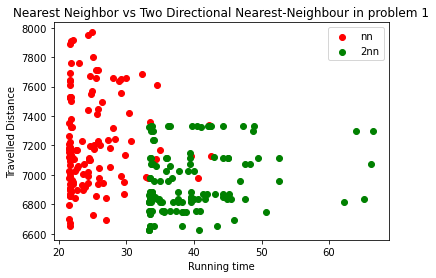

In [76]:
#comparing the two algorithms with a plot distance vs running times in problem 1

x1 = time1_nn
x11 = time1_mnn

y1 = result1[0]
y11 = result11[0]

plt.scatter(x1, y1, color='r', label='nn')
plt.scatter(x11, y11, color='g', label='2nn')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Running time")
plt.ylabel("Travelled Distance")
plt.title("Nearest Neighbor vs Two Directional Nearest-Neighbour in problem 1")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

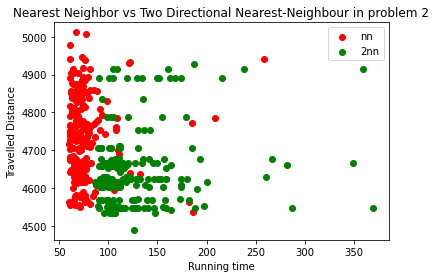

In [57]:
#comparing the two algorithms with a plot distance vs running times in problem 2

x2 = time2_nn
x22 = time2_mnn

y2 = result2[0]
y22 = result22[0]

plt.scatter(x2, y2, color='r', label='nn')
plt.scatter(x22, y22, color='g', label='2nn')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Running time")
plt.ylabel("Travelled Distance")
plt.title("Nearest Neighbor vs Two Directional Nearest-Neighbour in problem 2")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

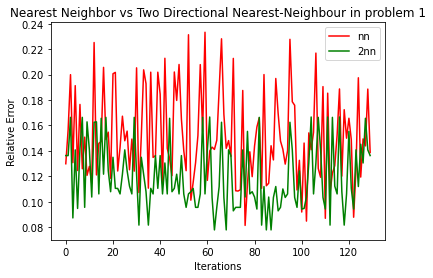

In [77]:
#relative errors for both algorithms in problem1

x =[x for x in range(0,130)]


error_list1 = []
error_list11 = []
for i in range(0,130):
    error_list1.append(abs(6110-result1[0][i])/result1[0][i])
    error_list11.append(abs(6110-result11[0][i])/result11[0][i])
    

plt.plot(x, error_list1, color='r', label='nn')
plt.plot(x, error_list11, color='g', label='2nn')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Iterations")
plt.ylabel("Relative Error")
plt.title("Nearest Neighbor vs Two Directional Nearest-Neighbour in problem 1")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()
    
    

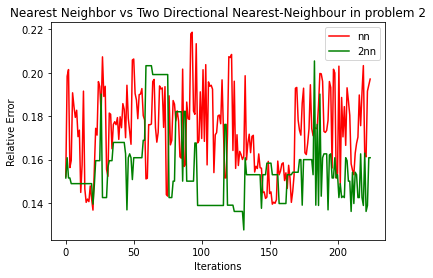

In [78]:
#relative errors for both algorithms in problem2

x =[x for x in range(0,225)]


error_list2 = []
error_list22 = []
for i in range(0,225):
    error_list2.append(abs(3916-result2[0][i])/result2[0][i])
    error_list22.append(abs(3916-result22[0][i])/result22[0][i])
    

plt.plot(x, error_list2, color='r', label='nn')
plt.plot(x, error_list22, color='g', label='2nn')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Iterations")
plt.ylabel("Relative Error")
plt.title("Nearest Neighbor vs Two Directional Nearest-Neighbour in problem 2")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [79]:
#relative errors with the "best" solution obtained with NN and6 2NN for both datasets

print("Relative error with ch130 with NN:" ,(abs(6110-6651)/6651)*100)
print("Relative error with tsp225 with NN:" ,(abs(3916-4536)/4536)*100)
print("Relative error with ch130 with 2NN:" ,(abs(6110-6626)/6626)*100)
print("Relative error with tsp225 with 2NN:" ,(abs(3916-4489)/4489)*100)


Relative error with ch130 with NN: 8.134115170651029
Relative error with tsp225 with NN: 13.668430335097002
Relative error with ch130 with 2NN: 7.787503773015395
Relative error with tsp225 with 2NN: 12.76453553129873
